Import

In [1]:
import matplotlib.pyplot as plt
import cv # custom cross validation
import models
import json
import pandas as pd
import numpy as np

Data

In [4]:
df = pd.read_csv("data/aggregated_data.csv")

In [3]:
# Get the matrix format of X and y
X = df.loc[:, df.columns != 'w-dl'].values
y = df['w-dl'].values

SVM (from scratch)

In [73]:
roc_auc_values = []
lambda_values = np.arange(0.01,2, 0.001)
# lambda_values = np.arange(10,105, 5)
for λ in lambda_values:
    mySVC = models.SVM(Lambda=λ)
    kf_cv = cv.KFold_cv(model=mySVC, num_folds=5)
    roc_auc = kf_cv.cv_metrics(X,y,metrics = ["roc_auc"])[0]
    roc_auc_values.append(roc_auc)
# 4 minutes of running time
# best lambda = 0.063

In [101]:
values = pd.concat((pd.Series(roc_auc_values, name='AUC'), pd.Series(lambda_values, name='λ')), axis=1)
values[values.AUC == values.AUC.max()]

,AUC,λ
53,0.692338,0.063
54,0.692338,0.064
55,0.692338,0.065
56,0.692338,0.066


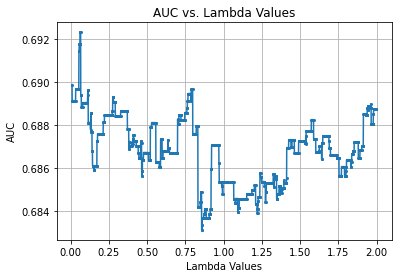

In [74]:
plt.plot(lambda_values, roc_auc_values, linestyle='-', marker='o', markersize=2)
plt.xlabel('Lambda Values')
plt.ylabel('AUC')
plt.title('AUC vs. Lambda Values')
plt.grid(True)
plt.show()

In [103]:
mySVC = models.SVM(Lambda=0.063)
kf_cv = cv.KFold_cv(model=mySVC, num_folds=5)
kf_cv.cv_metrics(X,y,metrics = ["roc_auc", "f1", "accuracy"])

[0.6923379232407375, 0.6354614882085363, 0.681605500935398]

Tree classifier (from scratch)

In [ ]:
tree_AUC_values = []
max_depth_values = [2,3,4,5,6,7,8,9,10]
for depth in max_depth_values:
    tree = models.DecisionTree(max_depth=depth)
    kf_cv = cv.KFold_cv(model=tree, num_folds=5)
    AUC = kf_cv.cv_metrics(X,y,metrics = ["roc_auc"])
    tree_AUC_values.append(AUC)
values = pd.concat((pd.Series(tree_AUC_values, name='AUC'), pd.Series(max_depth_values, name='max_depth')), axis=1)
# 22 mins of running time
# best max depth = 4

In [15]:
# values
values[values.AUC == values.AUC.max()[0]]

,AUC,max_depth
2,[0.7386470836449116],4


In [4]:
tree = models.DecisionTree(max_depth=4)

In [5]:
tree.fit(X,y)

In [7]:
tree.visualize_tree() # it saves the tree image

In [ ]:
kf_cv = cv.KFold_cv(model=tree, num_folds=5)
kf_cv.cv_metrics(X,y,metrics = ["roc_auc", "f1", "accuracy"])

[0.6992252573812727, 0.5970039130041009, 0.7496195385370643]

k-NN (from scratch)

In [ ]:
for k in range(2,21):
    temp_knn = models.KNNClassifier(k=k)
    kf_cv = cv.KFold_cv(model=temp_knn, num_folds=5)
    print(kf_cv.cv_metrics(X,y,metrics = ["roc_auc", "f1", "accuracy"]))
# 25 mins of running time
# best k = 7

In [105]:
knn = models.KNNClassifier(k=7)

In [ ]:
kf_cv = cv.KFold_cv(model=knn, num_folds=5)
kf_cv.cv_metrics(X,y,metrics = ["roc_auc", "f1", "accuracy"])

Logistic regression (from scratch)

In [ ]:
for eta in [0.01,0.001,0.05,0.005,0.0001,0.0005]:
    logistic = models.LogisticRegression(learning_rate=eta)
    kf_cv = cv.KFold_cv(model=logistic, num_folds=5)
    print(kf_cv.cv_metrics(X,y,metrics = ["accuracy", "precision", "recall", "roc_auc"]))
# best eta = 0.01

In [8]:
logistic = models.LogisticRegression(learning_rate=0.01)

In [11]:
kf_cv = cv.KFold_cv(model=logistic, num_folds=5)
kf_cv.cv_metrics(X,y,metrics = ["roc_auc", "f1", "accuracy"])

[0.7736059746412883, 0.7207185394940993, 0.7707333253725006]

In [31]:
import plotly.graph_objs as go
import plotly.offline as py

# Create the df of features and corresponding weights
features_names = df.columns[:-1]
feature_weights_df = pd.concat((pd.Series(features_names, name="Feature"),pd.Series(logistic.weights, name="Weight")), axis=1)
feature_weights_df = feature_weights_df.sort_values(by="Weight", ascending=True)

# Plot the interactive figure
fig = go.Figure([go.Bar(x=feature_weights_df.Feature, y=feature_weights_df.Weight)])
py.iplot(fig)

Models evaluation with KFold Cross Validation

In [107]:
for model in [mySVC, tree, knn, logistic]:
    kf_cv = cv.KFold_cv(model=model, num_folds=5)
    print(model, kf_cv.cv_metrics(X,y,metrics = ["roc_auc", "f1", "accuracy"]))

<models.SVM object at 0x0000020948D21610> [0.6923379232407375, 0.6354614882085363, 0.681605500935398]
<models.DecisionTree object at 0x0000020948D21B20> [0.7161450782532623, 0.6423246514418857, 0.7387961230744736]
<models.KNNClassifier object at 0x0000020948D21BB0> [0.6279604874925558, 0.5061303249346318, 0.6715599251681725]
<models.LogisticRegression object at 0x0000020948D21310> [0.7736059746412883, 0.7207185394940993, 0.7707333253725006]
